In [1]:
import numpy as np
import pandas as pd
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import Lasso, Ridge, ElasticNet
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import scipy as sp
import IPython
import sys
import sklearn
%matplotlib inline
import seaborn as sns
plt.rcParams['figure.figsize'] = (15,13)

In [2]:
#loading the datasets
train = pd.read_csv("train_AV_BFS.csv")
test = pd.read_csv("test_AV_BFS.csv")
sample = pd.read_csv("sample_AV_BFS.csv")

In [3]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [4]:
#view on train dataset
train.head(50)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969
5,1000003,P00193542,M,26-35,15,A,3,0,1,2.0,NaN,15227
6,1000004,P00184942,M,46-50,7,B,2,1,1,8.0,17.0,19215
7,1000004,P00346142,M,46-50,7,B,2,1,1,15.0,NaN,15854
8,1000004,P0097242,M,46-50,7,B,2,1,1,16.0,NaN,15686
9,1000005,P00274942,M,26-35,20,A,1,1,8,NaN,NaN,7871


In [5]:
#shape of trainset
train.shape

(550068, 12)

In [6]:
#view on test dataset
test.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.0,NaN
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0


In [7]:
#shape of testset
test.shape

(233599, 11)

In [8]:
#view on sample submission dataset
sample.head()

,Purchase,User_ID,Product_ID
0,100,1000004,P00128942
1,100,1000009,P00113442
2,100,1000010,P00288442
3,100,1000010,P00145342
4,100,1000011,P00053842


In [9]:
#view on sample dataset
sample.shape

(233599, 3)

In [10]:
#information about the train dataset
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [11]:
#describing the trainset
train.describe(include = 'all')

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.500680e+05,550068,550068,550068,550068.000000,550068,550068,550068.000000,550068.000000,376430.000000,166821.000000,550068.000000
unique,NaN,3631,2,7,NaN,3,5,NaN,NaN,NaN,NaN,NaN
top,NaN,P00265242,M,26-35,NaN,B,1,NaN,NaN,NaN,NaN,NaN
freq,NaN,1880,414259,219587,NaN,231173,193821,NaN,NaN,NaN,NaN,NaN
mean,1.003029e+06,NaN,NaN,NaN,8.076707,NaN,NaN,0.409653,5.404270,9.842329,12.668243,9263.968713
std,1.727592e+03,NaN,NaN,NaN,6.522660,NaN,NaN,0.491770,3.936211,5.086590,4.125338,5023.065394
min,1.000001e+06,NaN,NaN,NaN,0.000000,NaN,NaN,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001516e+06,NaN,NaN,NaN,2.000000,NaN,NaN,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003077e+06,NaN,NaN,NaN,7.000000,NaN,NaN,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,NaN,NaN,NaN,14.000000,NaN,NaN,1.000000,8.000000,15.000000,16.000000,12054.000000


In [12]:
#combining the train and test datasets in a dataframe
df = pd.concat([train,test])
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969.0


In [13]:
df_corr = df.apply(lambda x : pd.factorize(x)[0]).corr(method='pearson', min_periods=1)
df_corr

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
User_ID,1.000000,-0.000245,-0.039336,-0.040425,0.012752,0.022979,0.003012,0.024689,0.009394,0.001527,0.000198,0.012345
Product_ID,-0.000245,1.000000,-0.016172,-0.007178,0.001190,-0.011776,0.008092,0.013626,0.260639,-0.069900,-0.172093,0.086091
Gender,-0.039336,-0.016172,1.000000,-0.001278,-0.034558,-0.006635,-0.014917,-0.010945,-0.004874,0.022883,0.037437,0.015024
Age,-0.040425,-0.007178,-0.001278,1.000000,0.076782,0.040571,0.007373,-0.079586,-0.006740,0.005421,0.009039,0.001001
Occupation,0.012752,0.001190,-0.034558,0.076782,1.000000,0.023362,0.023051,-0.011901,0.002390,-0.007151,-0.005033,-0.001584
City_Category,0.022979,-0.011776,-0.006635,0.040571,0.023362,1.000000,-0.011536,0.016108,-0.005866,0.012284,0.010388,-0.000620
Stay_In_Current_City_Years,0.003012,0.008092,-0.014917,0.007373,0.023051,-0.011536,1.000000,0.010207,0.003010,-0.002629,-0.004197,-0.001201
Marital_Status,0.024689,0.013626,-0.010945,-0.079586,-0.011901,0.016108,0.010207,1.000000,0.011505,-0.001503,-0.010135,-0.000716
Product_Category_1,0.009394,0.260639,-0.004874,-0.006740,0.002390,-0.005866,0.003010,0.011505,1.000000,-0.099640,-0.216511,0.256880
Product_Category_2,0.001527,-0.069900,0.022883,0.005421,-0.007151,0.012284,-0.002629,-0.001503,-0.099640,1.000000,0.236419,0.067360


In [14]:
#getting features with non numerical  or catagorical values
df_catagory = df.select_dtypes(exclude=np.number)
df_catagory.head()

,Product_ID,Gender,Age,City_Category,Stay_In_Current_City_Years
0,P00069042,F,0-17,A,2
1,P00248942,F,0-17,A,2
2,P00087842,F,0-17,A,2
3,P00085442,F,0-17,A,2
4,P00285442,M,55+,C,4+


In [15]:
#check for null values in the df_catagory
df_catagory.isna().sum()

Product_ID                    0
Gender                        0
Age                           0
City_Category                 0
Stay_In_Current_City_Years    0
dtype: int64

In [16]:
df_catagory['Product_ID'].nunique()

3677

In [17]:
df['Product_ID'] = df['Product_ID'].str.replace('P00', '').astype(int)

In [18]:
df['Product_ID'].head(50)

0      69042
1     248942
2      87842
3      85442
4     285442
5     193542
6     184942
7     346142
8      97242
9     274942
10    251242
11     14542
12     31342
13    145042
14    231342
15    190242
16     96642
17     58442
18     36842
19    249542
20    220442
21    156442
22    213742
23    214442
24    303442
25    135742
26     39942
27    161442
28     78742
29     85942
30    118742
31    297942
32    266842
33     58342
34     32442
35    105942
36    182642
37    186942
38    155442
39    221342
40     87242
41    111142
42    259342
43     94542
44    148642
45    312142
46    113242
47    192642
48    110842
49    189642
Name: Product_ID, dtype: int32

In [19]:
df['Gender'].value_counts()

M    590031
F    193636
Name: Gender, dtype: int64

In [20]:
df['Gender'] = df['Gender'].replace({'M':0, 'F':1})

In [21]:
df['Age'].value_counts()

26-35    313015
36-45    156724
18-25    141953
46-50     65278
51-55     54784
55+       30579
0-17      21334
Name: Age, dtype: int64

In [22]:
df['Age'] = df['Age'].replace('55+',55).astype(str)

In [23]:
def Age_range_to_num(x):
    tokens = x.split('-')
    if len(tokens) == 2:
        return (np.round(float(tokens[0])+float(tokens[1]))/2).astype(int)
    try:
        return float(x)
    except:
        pass

In [24]:
df['Age']=df.Age.apply(Age_range_to_num).astype(int)

In [25]:
df['Age'].head(20)

0      8
1      8
2      8
3      8
4     55
5     30
6     48
7     48
8     48
9     30
10    30
11    30
12    30
13    30
14    53
15    53
16    53
17    53
18    40
19    30
Name: Age, dtype: int32

In [26]:
df['City_Category'].value_counts()

B    329739
C    243684
A    210244
Name: City_Category, dtype: int64

In [27]:
df['Stay_In_Current_City_Years'].unique()

array(['2', '4+', '3', '1', '0'], dtype=object)

In [28]:
df['Stay_In_Current_City_Years'] = df['Stay_In_Current_City_Years'].replace('4+',4).astype(int)

In [29]:
df_catagory = df.select_dtypes(exclude=np.number)
df_catagory.head()

,City_Category
0,A
1,A
2,A
3,A
4,C


In [30]:
df_cat_encoded = pd.get_dummies(df_catagory.select_dtypes(exclude=np.number))
df_cat_encoded.head()

,City_Category_A,City_Category_B,City_Category_C
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,0,0,1


In [31]:
del df['City_Category']

In [32]:
df_numeric = df.select_dtypes(include=np.number).drop(columns = 'Purchase')
df_numeric.head()

,User_ID,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000001,69042,1,8,10,2,0,3,NaN,NaN
1,1000001,248942,1,8,10,2,0,1,6.0,14.0
2,1000001,87842,1,8,10,2,0,12,NaN,NaN
3,1000001,85442,1,8,10,2,0,12,14.0,NaN
4,1000002,285442,0,55,16,4,0,8,NaN,NaN


In [33]:
df_numeric = df_numeric.fillna(0)

In [34]:
df_numeric['User_ID'] = df_numeric['User_ID']-1000000

In [35]:
df_numeric['User_ID'] = LabelEncoder().fit_transform(df['User_ID'])

In [36]:
df_numeric['User_ID'].head(50)

0      0
1      0
2      0
3      0
4      1
5      2
6      3
7      3
8      3
9      4
10     4
11     4
12     4
13     4
14     5
15     5
16     5
17     5
18     6
19     7
20     7
21     7
22     7
23     7
24     7
25     8
26     8
27     8
28     8
29     9
30     9
31     9
32     9
33     9
34     9
35     9
36     9
37     9
38     9
39     9
40     9
41     9
42     9
43     9
44     9
45     9
46     9
47    10
48    10
49    10
Name: User_ID, dtype: int64

In [37]:
df_numeric.isna().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Product_Category_3            0
dtype: int64

In [38]:
df_numeric['Product_ID'] = StandardScaler().fit_transform(df_numeric['Product_ID'].values.reshape(-1, 1))

In [40]:
df_numeric.head()

,User_ID,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,0,-1.027277,1,8,10,2,0,3,0.0,0.0
1,0,0.728995,1,8,10,2,0,1,6.0,14.0
2,0,-0.843742,1,8,10,2,0,12,0.0,0.0
3,0,-0.867172,1,8,10,2,0,12,14.0,0.0
4,1,1.085326,0,55,16,4,0,8,0.0,0.0


In [41]:
preprocessed_data = pd.concat([df_numeric,df_cat_encoded, df['Purchase']] , axis = 1)

preprocessed_data.to_csv('preprocessed_AV_BSF.csv', index = False)

In [42]:
preprocessed_data= pd.read_csv('preprocessed_AV_BSF.csv')

In [43]:
preprocessed_data.head()

,User_ID,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,City_Category_A,City_Category_B,City_Category_C,Purchase
0,0,-1.027277,1,8,10,2,0,3,0.0,0.0,1,0,0,8370.0
1,0,0.728995,1,8,10,2,0,1,6.0,14.0,1,0,0,15200.0
2,0,-0.843742,1,8,10,2,0,12,0.0,0.0,1,0,0,1422.0
3,0,-0.867172,1,8,10,2,0,12,14.0,0.0,1,0,0,1057.0
4,1,1.085326,0,55,16,4,0,8,0.0,0.0,0,0,1,7969.0


In [44]:
preprocessed_data.isna().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2                 0
Product_Category_3                 0
City_Category_A                    0
City_Category_B                    0
City_Category_C                    0
Purchase                      233599
dtype: int64

In [45]:
train_processed = preprocessed_data.dropna(subset=['Purchase'])

In [46]:
test_processed = preprocessed_data[preprocessed_data['Purchase'].isna()]

In [47]:
train_X = train_processed.drop(columns=["Purchase"])
train_y = train_processed['Purchase']
test_X = test_processed.drop(columns=["Purchase"])

In [48]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [49]:
sample = pd.read_csv("sample_AV_BFS.csv")
def run_model(model, train_X, train_y, test_X, sample, filename ):
    model.fit(train_X, train_y)
    pd.Series(model.coef_,index=test_X.columns).plot(kind = "bar")
    pred_train = model.predict(train_X)
    pred_test = model.predict(test_X)
    pred_test = abs(pred_test)
    print("Mean Absolute Error of train data = ",mean_absolute_error(train_y,pred_train))
    print("RMSE of train data = ",np.sqrt(mean_squared_error(train_y, pred_train)))
    score = cross_val_score(model, train_X, train_y, cv = 10, scoring = "neg_root_mean_squared_error" )
    print("Cross validation Score  = ",np.mean(np.abs(score)))
    print("Mean Absolute Percentage Error of train data = ", mean_absolute_percentage_error(train_y, pred_train))
    sample["Purchase"] = pred_test
    sample.to_csv(filename, index = False)


Mean Absolute Error of train data =  3525.1673709228994
RMSE of train data =  4615.750289351168
Cross validation Score  =  4618.6892983326525
Mean Absolute Percentage Error of train data =  109.5150955981779


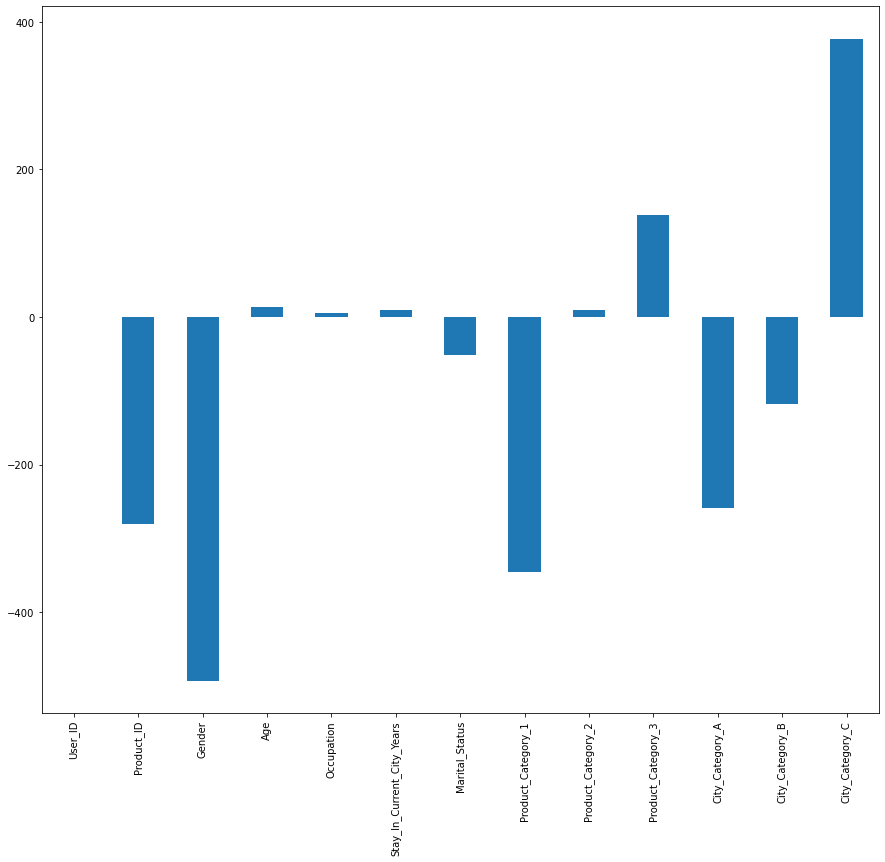

In [50]:
LR_model = LinearRegression()
run_model(LR_model, train_X, train_y, test_X, sample, "BFS_AV_predresults_LR.csv" )

In [51]:
print("Training set score_LR: {:.2f}".format(LR_model.score(train_X, train_y)))
print("Number of features used_LR: {}".format(np.sum(LR_model.coef_ != 0)))

Training set score_LR: 0.16
Number of features used_LR: 13


Mean Absolute Error of train data =  3526.7532123938486
RMSE of train data =  4615.772723450004
Cross validation Score  =  4618.725938392709
Mean Absolute Percentage Error of train data =  110.13361547942992


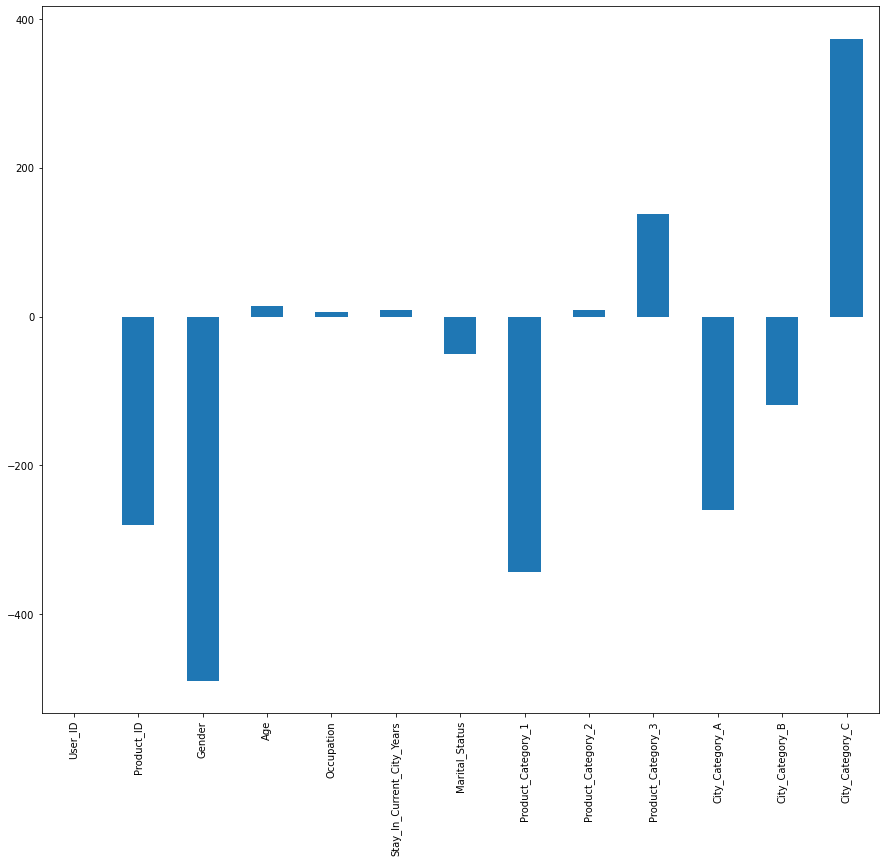

In [52]:
Ridge_model = Ridge(alpha=0.01,normalize=True)
run_model(Ridge_model, train_X, train_y, test_X, sample, "BFS_AV_predresults_ridge.csv" )

In [53]:
print("Training set score_Ridge: {:.2f}".format(Ridge_model.score(train_X, train_y)))
print("Number of features used_Ridge: {}".format(np.sum(Ridge_model.coef_ != 0)))

Training set score_Ridge: 0.16
Number of features used_Ridge: 13


Mean Absolute Error of train data =  3726.42440962805
RMSE of train data =  4724.764269477509
Cross validation Score  =  4721.6912806700275
Mean Absolute Percentage Error of train data =  145.6073706054146


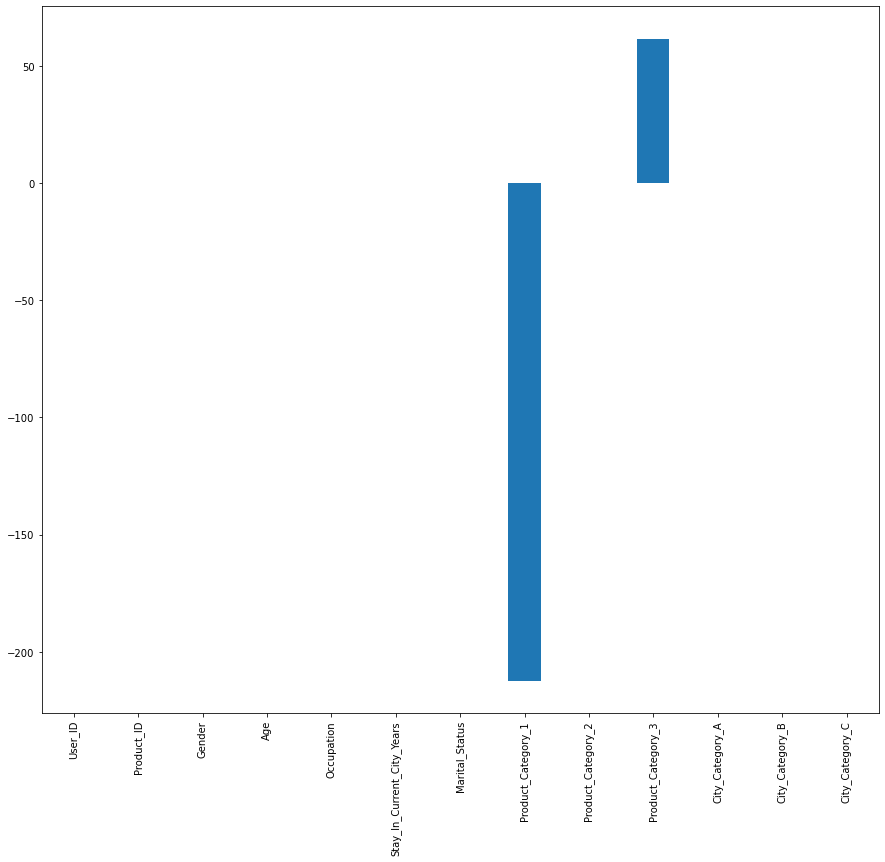

In [54]:
Lasso_model = Lasso(alpha=1,normalize=True)
run_model(Lasso_model, train_X, train_y, test_X, sample, "BFS_AV_predresults_lasso.csv" )

In [55]:
print("Training set score_Lasso: {:.2f}".format(Lasso_model.score(train_X, train_y)))
print("Number of features used_Lasso: {}".format(np.sum(Lasso_model.coef_ != 0)))

Training set score_Lasso: 0.12
Number of features used_Lasso: 2


Mean Absolute Error of train data =  3524.2914480185445
RMSE of train data =  4615.953221881109
Cross validation Score  =  4618.917143271132
Mean Absolute Percentage Error of train data =  109.6647804907182


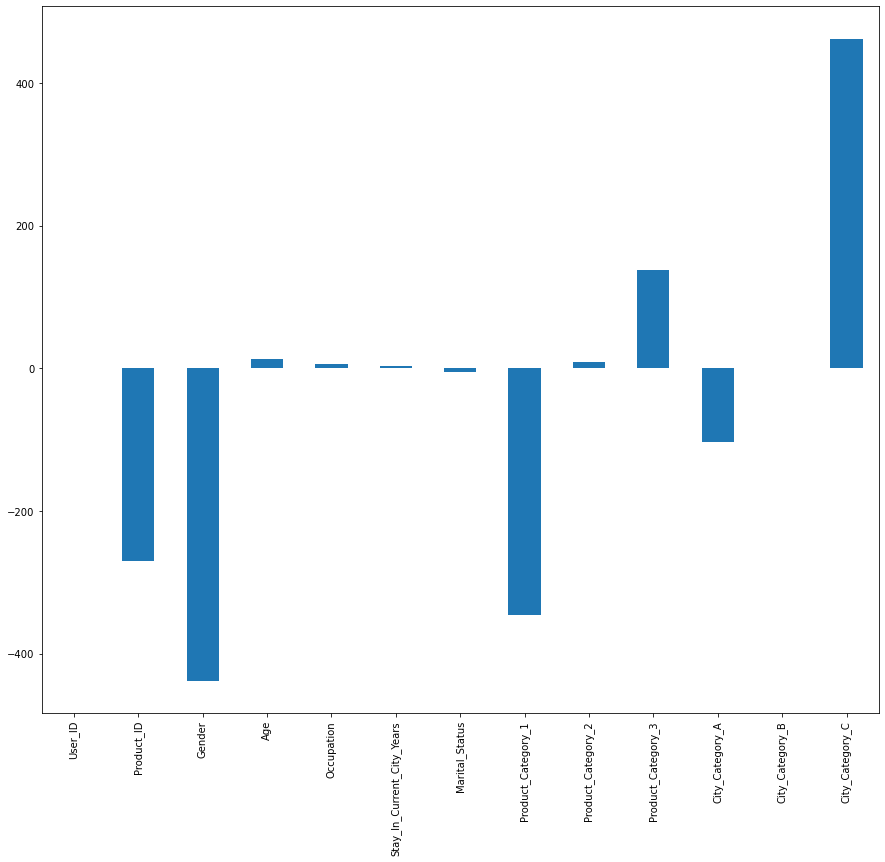

In [56]:
ElasticNet_model = ElasticNet(alpha=10,l1_ratio=1, max_iter=1000000)
run_model(ElasticNet_model, train_X, train_y, test_X, sample, "BFS_AV_predresults_elasticnet.csv" )

In [57]:
print("Training set score_elasticnet: {:.2f}".format(ElasticNet_model.score(train_X, train_y)))
print("Number of features used_elasticnet: {}".format(np.sum(ElasticNet_model.coef_ != 0)))

Training set score_elasticnet: 0.16
Number of features used_elasticnet: 12


Text(0, 0.5, 'coefficient magnitude')

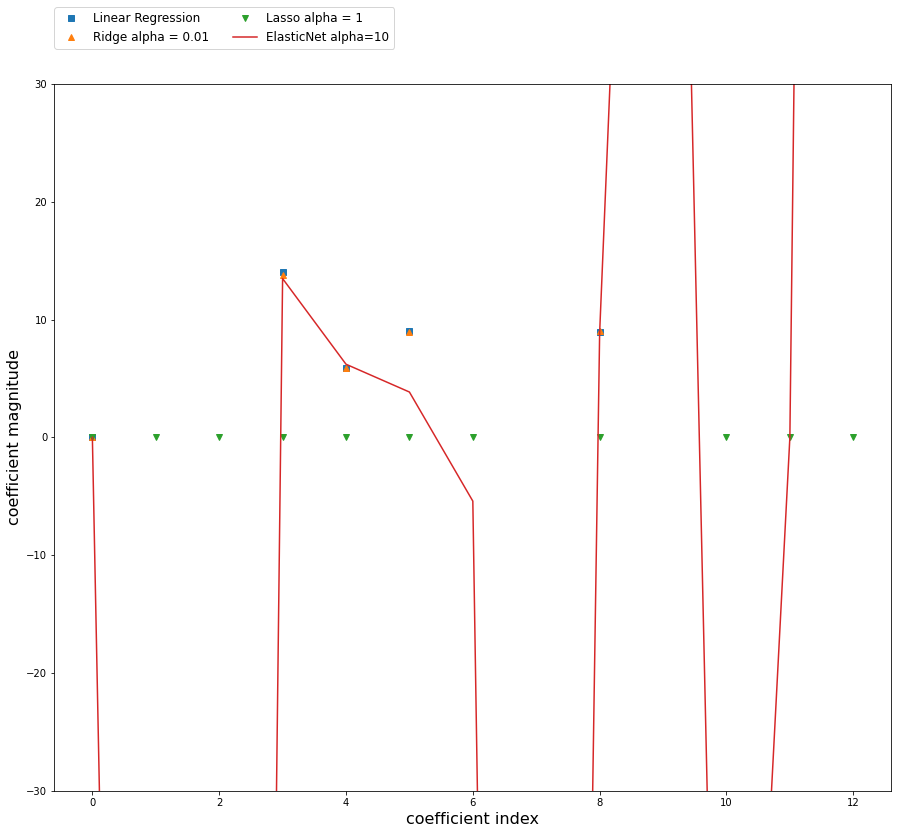

In [58]:
plt.plot(LR_model.coef_,'s',label = "Linear Regression")
plt.plot(Ridge_model.coef_,'^',label = "Ridge alpha = 0.01")
plt.plot(Lasso_model.coef_,'v',label = "Lasso alpha = 1")
plt.plot(ElasticNet_model.coef_, label = "ElasticNet alpha=10")
plt.legend(ncol=2, loc=(0, 1.05), fontsize = 12)
plt.ylim(-30, 30)
plt.xlabel("coefficient index", fontsize = 16)
plt.ylabel("coefficient magnitude", fontsize = 16)

In [59]:
sample = pd.read_csv("sample_AV_BFS.csv")
def run_model_1(model, train_X, train_y, test_X, sample, filename ):
    model.fit(train_X, train_y)
    pred_train = model.predict(train_X)
    pred_test = model.predict(test_X)
    pred_test = abs(pred_test)
    print("Mean Absolute Error of train data = ",mean_absolute_error(train_y,pred_train))
    print("RMSE of train data = ",np.sqrt(mean_squared_error(train_y, pred_train)))
    score = cross_val_score(model, train_X, train_y, cv = 10, scoring = "neg_root_mean_squared_error" )
    print("Cross validation Score  = ",np.mean(np.abs(score)))
    print("Mean Absolute Percentage Error of train data = ", mean_absolute_percentage_error(train_y, pred_train))
    sample["Purchase"] = pred_test
    sample.to_csv(filename, index = False)


In [63]:
res = []
for i in range(1,5):
    model = KNeighborsRegressor(n_neighbors=i)
    print(i)
    err = run_model_1(model, train_X, train_y, test_X, sample, str(i)[:-2]+".csv")
    res.append(err)

1
Mean Absolute Error of train data =  0.0
RMSE of train data =  0.0
Cross validation Score  =  4785.353904292583
Mean Absolute Percentage Error of train data =  0.0
2
Mean Absolute Error of train data =  1581.718692052619
RMSE of train data =  2347.3409929663417
Cross validation Score  =  4356.801258862521
Mean Absolute Percentage Error of train data =  70.57625666117151
3
Mean Absolute Error of train data =  1996.2022737794846
RMSE of train data =  2844.2266306657402
Cross validation Score  =  4244.289015294918
Mean Absolute Percentage Error of train data =  96.74938568331054
4
Mean Absolute Error of train data =  2220.622761640379
RMSE of train data =  3116.6838802151447
Cross validation Score  =  4209.55130278095
Mean Absolute Percentage Error of train data =  110.87937245355222


In [65]:
for i in range(7,20):
    model = KNeighborsRegressor(n_neighbors=i)
    print(i)
    err = run_model_1(model, train_X, train_y, test_X, sample, str(i)[:-2]+".csv")

7
Mean Absolute Error of train data =  2564.078502502028
RMSE of train data =  3537.8522521765444
Cross validation Score  =  4214.781353470991
Mean Absolute Percentage Error of train data =  132.71147371644386
8
Mean Absolute Error of train data =  2633.734080377335
RMSE of train data =  3622.6583330905946
Cross validation Score  =  4227.302342879144
Mean Absolute Percentage Error of train data =  136.7287836599557
9
Mean Absolute Error of train data =  2692.891559669794
RMSE of train data =  3693.753121443704
Cross validation Score  =  4239.520175868276
Mean Absolute Percentage Error of train data =  139.91581969672063
10
Mean Absolute Error of train data =  2743.3674380258435
RMSE of train data =  3753.762930285717
Cross validation Score  =  4250.84572637074
Mean Absolute Percentage Error of train data =  142.2886041134395
11
Mean Absolute Error of train data =  2785.434425958576
RMSE of train data =  3803.8463039199596
Cross validation Score  =  4262.182697342756
Mean Absolute Perce

In [60]:
KNeighborsRegressor_model = KNeighborsRegressor(n_neighbors=3)
run_model_1(KNeighborsRegressor_model, train_X, train_y, test_X, sample, "BFS_AV_predresults_KNeighborsRegression.csv" )

Mean Absolute Error of train data =  1996.2022737794846
RMSE of train data =  2844.2266306657402
Cross validation Score  =  4244.289015294918
Mean Absolute Percentage Error of train data =  96.74938568331054


In [62]:
print("Training set score KNeighborsRegressor: {:.2f}".format(KNeighborsRegressor_model.score(train_X, train_y)))

Training set score KNeighborsRegressor: 0.68


In [63]:
DecisionTreeRegressor_model = DecisionTreeRegressor(max_depth = 12, random_state=0)
run_model_1(DecisionTreeRegressor_model, train_X, train_y, test_X, sample, "BFS_AV_predresults_DecisionTreeRegression.csv" )

Mean Absolute Error of train data =  2023.6211890299203
RMSE of train data =  2711.173994265325
Cross validation Score  =  2805.6851007013906
Mean Absolute Percentage Error of train data =  31.154716171755815


In [64]:
print("Training set score DecisionTreeRegressor: {:.2f}".format(DecisionTreeRegressor_model.score(train_X, train_y)))
print("Number of features used DecisionTreeRegressor: {}".format(np.sum(DecisionTreeRegressor_model.feature_importances_ != 0)))

Training set score DecisionTreeRegressor: 0.71
Number of features used DecisionTreeRegressor: 13


In [65]:
XGBRegressor_model = XGBRegressor(max_depth = 6, random_state=0)
run_model_1(XGBRegressor_model, train_X, train_y, test_X, sample, "BFS_AV_predresult_XGBRegression.csv" )

Mean Absolute Error of train data =  1931.5833013264935
RMSE of train data =  2580.339305602867
Cross validation Score  =  2637.281661812444
Mean Absolute Percentage Error of train data =  32.70759394541384


In [66]:
print("Training set score XGBRegressor: {:.2f}".format(XGBRegressor_model.score(train_X, train_y)))
print("Number of features used XGBRegressor: {}".format(np.sum(XGBRegressor_model.feature_importances_ != 0)))

Training set score XGBRegressor: 0.74
Number of features used XGBRegressor: 13


In [67]:
XGBRegressor_model = XGBRegressor(max_depth = 7, random_state=0)
run_model_1(XGBRegressor_model, train_X, train_y, test_X, sample, "BFS_AV_predresult_XGBRegression_7.csv" )

Mean Absolute Error of train data =  1873.6340361988991
RMSE of train data =  2509.222646566423
Cross validation Score  =  2587.9479992162783
Mean Absolute Percentage Error of train data =  31.89266580562019


In [68]:
print("Training set score XGBRegressor when depth=7: {:.2f}".format(XGBRegressor_model.score(train_X, train_y)))
print("Number of features used XGBRegressor when depth=7: {}".format(np.sum(XGBRegressor_model.feature_importances_ != 0)))

Training set score XGBRegressor when depth=7: 0.75
Number of features used XGBRegressor when depth=7: 13


In [69]:
XGBRegressor_model = XGBRegressor(max_depth = 8, random_state=0)
run_model_1(XGBRegressor_model, train_X, train_y, test_X, sample, "BFS_AV_predresult_XGBRegression_8.csv" )

Mean Absolute Error of train data =  1810.7900032057782
RMSE of train data =  2426.4192489031034
Cross validation Score  =  2564.7889669379447
Mean Absolute Percentage Error of train data =  31.254427925298923


In [70]:
print("Training set score XGBRegressor when depth=8: {:.2f}".format(XGBRegressor_model.score(train_X, train_y)))
print("Number of features used XGBRegressor when depth=8: {}".format(np.sum(XGBRegressor_model.feature_importances_ != 0)))

Training set score XGBRegressor when depth=8: 0.77
Number of features used XGBRegressor when depth=8: 13


In [71]:
XGBRegressor_model = XGBRegressor(max_depth = 10, random_state=0)
run_model_1(XGBRegressor_model, train_X, train_y, test_X, sample, "BFS_AV_predresult_XGBRegression_10.csv" )

Mean Absolute Error of train data =  1643.9737798828307
RMSE of train data =  2206.535593656424
Cross validation Score  =  2534.8588710629256
Mean Absolute Percentage Error of train data =  28.56783010371236


In [72]:
print("Training set score XGBRegressor when depth=10: {:.2f}".format(XGBRegressor_model.score(train_X, train_y)))
print("Number of features used XGBRegressor when depth=10: {}".format(np.sum(XGBRegressor_model.feature_importances_ != 0)))

Training set score XGBRegressor when depth=10: 0.81
Number of features used XGBRegressor when depth=10: 13


In [73]:
XGBRegressor_model = XGBRegressor(max_depth = 12, random_state=0)
run_model_1(XGBRegressor_model, train_X, train_y, test_X, sample, "BFS_AV_predresult_XGBRegression_12.csv" )

Mean Absolute Error of train data =  1440.8046400888372
RMSE of train data =  1941.3974452701282
Cross validation Score  =  2554.627664319893
Mean Absolute Percentage Error of train data =  24.940998585432467


In [74]:
print("Training set score XGBRegressor when depth=12: {:.2f}".format(XGBRegressor_model.score(train_X, train_y)))
print("Number of features used XGBRegressor when depth=12: {}".format(np.sum(XGBRegressor_model.feature_importances_ != 0)))

Training set score XGBRegressor when depth=12: 0.85
Number of features used XGBRegressor when depth=12: 13


In [76]:
RandomForestRegressor_model = RandomForestRegressor(max_depth = 8,n_estimators=100, n_jobs=-1, random_state=42)
run_model_1(RandomForestRegressor_model, train_X, train_y, test_X, sample, "BFS_AV_predresults_RandomForestRegression.csv" )

Mean Absolute Error of train data =  2143.36539490963
RMSE of train data =  2850.8016144678913
Cross validation Score  =  2866.909010725125
Mean Absolute Percentage Error of train data =  33.17679992431034


In [77]:
print("Training set score RandomForestRegressor: {:.2f}".format(RandomForestRegressor_model.score(train_X, train_y)))
print("Number of features used RandomForestRegressor: {}".format(np.sum(RandomForestRegressor_model.feature_importances_ != 0)))

Training set score RandomForestRegressor: 0.68
Number of features used RandomForestRegressor: 13


In [80]:
GradientBoostingRegressor_model = GradientBoostingRegressor(max_depth = 6, random_state=42)
run_model_1(GradientBoostingRegressor_model,train_X, train_y, test_X, sample, "BFS_AV_predresults_GradientBoostingRegression.csv" )

Mean Absolute Error of train data =  2047.8070629899576
RMSE of train data =  2719.07998217001
Cross validation Score  =  2747.9750175485556
Mean Absolute Percentage Error of train data =  33.54812528251909


In [81]:
print("Training set score GradientBoostingRegressor: {:.2f}".format(GradientBoostingRegressor_model.score(train_X, train_y)))
print("Number of features used GradientBoostingRegressor: {}".format(np.sum(GradientBoostingRegressor_model.feature_importances_ != 0)))

Training set score GradientBoostingRegressor: 0.71
Number of features used GradientBoostingRegressor: 13
